## 1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
* The prediction gets faster when lr increase


## 2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model. 

In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_class1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(6, input_shape=[1], name="input_layer1"),
    tf.keras.layers.Dense(6, input_shape=[1], name="input_layer2"),
    tf.keras.layers.Dense(6, input_shape=[1], name="input_layer3"),
    tf.keras.layers.Dense(6, input_shape=[1], name="input_layer4"),
    tf.keras.layers.Dense(6, name="output_layer")], name="model_class1")

# 2. Compile the model
model_class1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


In [24]:
model_class1.summary()

Model: "model_class1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 6)                 12        
                                                                 
 input_layer1 (Dense)        (None, 6)                 42        
                                                                 
 input_layer2 (Dense)        (None, 6)                 42        
                                                                 
 input_layer3 (Dense)        (None, 6)                 42        
                                                                 
 input_layer4 (Dense)        (None, 6)                 42        
                                                                 
 output_layer (Dense)        (None, 6)                 42        
                                                                 
Total params: 222
Trainable params: 222
Non-trainable 

## 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

Create dataset

In [27]:
from sklearn.datasets import make_moons
# make_moons == Make two interleaving half circles.

# Make 1K examples
n_samples = 1000

# Create toy datasets
X, y = make_moons(n_samples,
                    noise=0.03,
                    random_state=42)



Visualize dataset

In [28]:
X

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       ...,
       [ 1.65391483, -0.29179795],
       [-0.9341017 ,  0.35358221],
       [ 0.7968358 ,  0.60423662]])

In [29]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [30]:
# Checking the shape of X and y 
print(X.shape , y.shape)

(1000, 2) (1000,)


In [34]:
# Pack into dataframe
make_moons_df = pd.DataFrame({'col_1': X[: ,0],
                              'col_2': X[: ,1],
                              'label': y })

make_moons_df.head()

,col_1,col_2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


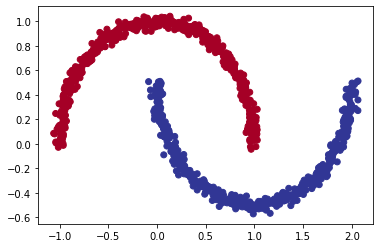

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [37]:
# Split dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Check shape after splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

Build model

In [41]:
X_train[0].shape

(2,)

In [57]:
from tensorflow.keras import layers 
# Set random seed
tf.random.set_seed(42)

# Create model
model_class2=tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    #layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model_class2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics =["accuracy"])

# Fit model
model_class2.fit(X_train, y_train, epochs=15)

Epoch 1/15
25/25 [==============================] - 1s 2ms/step - loss: 0.5880 - accuracy: 0.5475
Epoch 2/15
25/25 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7750
Epoch 3/15
25/25 [==============================] - 0s 2ms/step - loss: 0.4965 - accuracy: 0.8450
Epoch 4/15
25/25 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.8637
Epoch 5/15
25/25 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.8662
Epoch 6/15
25/25 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8725
Epoch 7/15
25/25 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8875
Epoch 8/15
25/25 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8863
Epoch 9/15
25/25 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8913
Epoch 10/15
25/25 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.8925
Epoch 11/15
25/25 [

Visualize model performance

In [60]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.

  Arguments:
    model --> trained model
    X --> feature data (numoy array)
    y --> truth label

  Returns:
    A visualization of model's performance (fitting with our data)
  """

  # Define axis boundaries of the plot and create meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


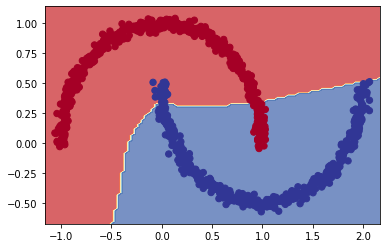

In [61]:
plot_decision_boundary(model_class2, X, y)

Better results can be achieved if it's trained for more epoch.

## 4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

In [43]:
import tensorflow as tf


# Getting the MNIST data from the keras dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Splitting into train and test 
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

# Checking the shapes of the splits 
train_images.shape , train_labels.shape , test_images.shape , test_labels.shape



((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [44]:
# Create a small list so we can index onto our training labels so they're human-readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


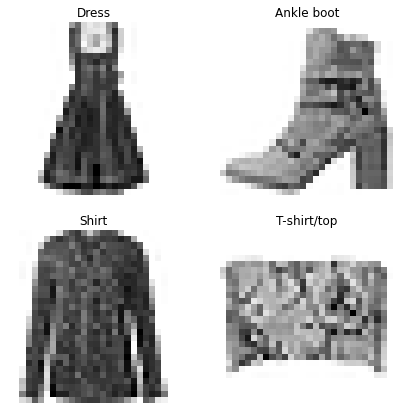

In [45]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_images)))
  plt.imshow(train_images[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## 5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [46]:
# Implementing a softmax function 
def softmax(x):
  '''
  Argument:
  x --> Accepts a tensor of any shape

  Returns: 
  --> softmax activations of the input tensor
  '''
  x = tf.cast(x , dtype = tf.float32) # to tackle the data type error of int32 / int64

  # Below is the forumale
  e_x = tf.math.exp(x - tf.math.reduce_max(x))
  return e_x / tf.math.reduce_sum(e_x , axis = 0)

In [47]:
# Creating sample tensor 
tensor = tf.constant([[1, 2, 3, 6],
                     [2, 4, 5, 6],
                     [3, 8, 7, 6]] )
tensor

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 2, 3, 6],
       [2, 4, 5, 6],
       [3, 8, 7, 6]], dtype=int32)>

In [48]:
# Applying our softmax function 
softmax(tensor)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.09003057, 0.00242826, 0.01587624, 0.3333333 ],
       [0.24472849, 0.01794253, 0.11731043, 0.3333333 ],
       [0.66524094, 0.9796292 , 0.8668133 , 0.3333333 ]], dtype=float32)>

## 6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

Prepare dataset

In [23]:
# Getting the MNIST data from the keras dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Splitting into train and test 
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

# Number of classes and class names
num_classes = 10     # 10 labels/classes

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Checking the shapes of the splits 
train_images.shape , train_labels.shape , test_images.shape , test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Build model

Reminder: There are two types of activation function

* tf.keras.losses.CategoricalCrossentropy() -- need label to be provided in a one_hot representation

* tf.keras.losses.SparseCategoricalCrossentropy() -- provide labels as integers



In [24]:
# Building a simple model for the fashion mnist 
model_class3 = tf.keras.Sequential([
  layers.Flatten(input_shape = (28 , 28)), 
  layers.Dense(64 , activation= 'relu'), 
  layers.Dense(32 , activation = 'relu'),
  layers.Dense(10 , activation='softmax')
])

# Compiling the model 
model_class3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # because our labels isnt one hot encoded
                     optimizer = tf.keras.optimizers.Adam() , 
                     metrics = ['accuracy'])

# Fitting the model 
history = model_class3.fit(train_images , train_labels , 
                           epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8509 - accuracy: 0.6102
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8291 - accuracy: 0.6866
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6593 - accuracy: 0.7455
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5582 - accuracy: 0.7952
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4943 - accuracy: 0.8263
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4577 - accuracy: 0.8385
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4385 - accuracy: 0.8450
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4191 - accuracy: 0.8522
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4025 - accuracy: 0.8590
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.389

Confusion matrix

In [25]:
# Function for the confusion matrix 
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [26]:
# Make prediction with model_class3
pred_probs = model_class3.predict(test_images)

# Convert pred_probs into predictions
preds = pred_probs.argmax(axis = 1)

# View first 10 preds
preds[:10]

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

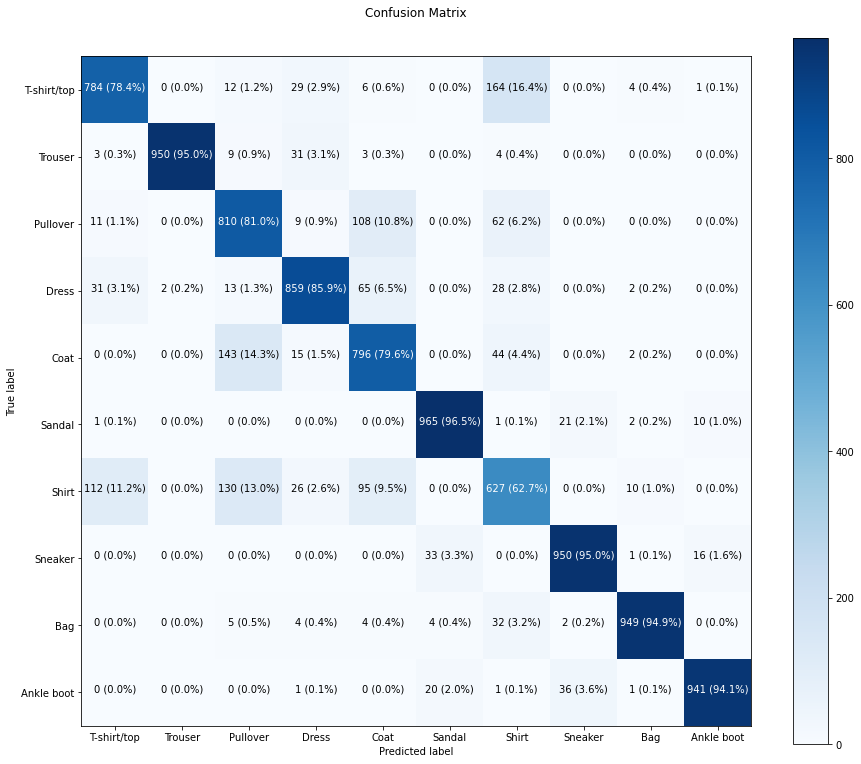

In [27]:
# Plot confusion matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = preds,
                      classes = class_names,
                      figsize = (15, 13),
                      text_size = 10)

In [28]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

Can use the pretty confusion matrix or something else?

In [29]:
# Make predictions
preds = model_class3.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [30]:
# Below function is from TensorFlow Tutorials (https://www.tensorflow.org/tutorials/keras/classification#verify_predictions)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



def plot_prediction_images():
  num_rows = 5 
  num_cols = 3
  num_images = num_rows * num_cols 
  plt.figure(figsize = (2*2*num_cols , 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols , 2*i+1)
    plot_image(i , preds[i], test_labels , test_images)
    plt.subplot(num_rows , 2*num_cols , 2*i+2)
    plot_value_array(i , preds[i] ,  test_labels)
  plt.tight_layout()
  plt.show

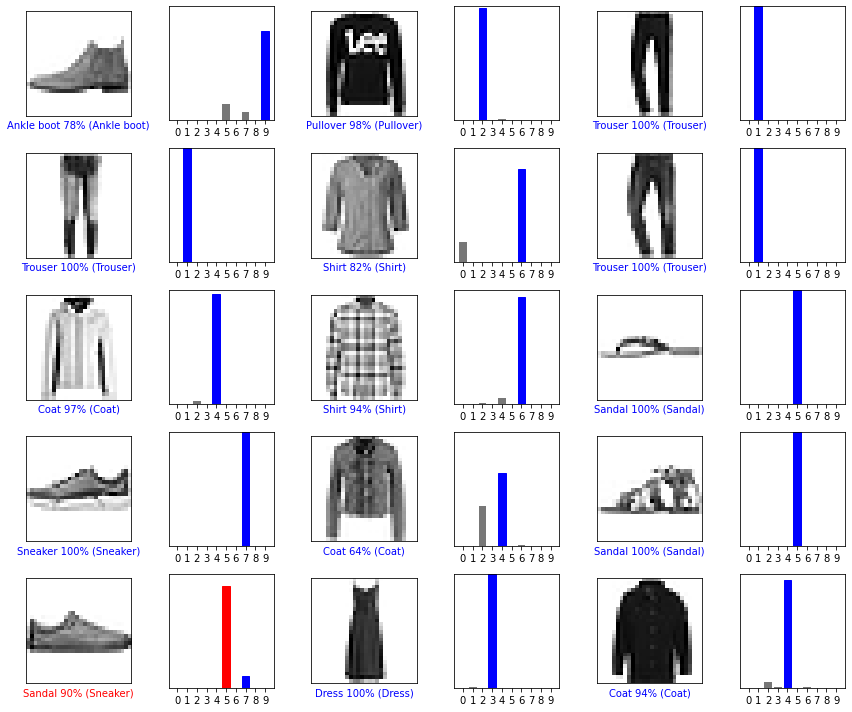

In [31]:
# Using our function
plot_prediction_images()